# Librairies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Assurez-vous que les ensembles de stop words pour différentes langues sont téléchargés
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/faycal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Chargement des données

In [2]:
# Chargement du fichier CSV dans un DataFrame
nom_fichier_csv = 'original_cleaned_lyrics.csv'
nom_fichier_csv = 'english_cleaned_lyrics.csv'
df = pd.read_csv(nom_fichier_csv)

# Affichage du DataFrame
print(df)


        Unnamed: 0   index                         song  year  \
0                0       0                    ego-remix  2009   
1                1       1                 then-tell-me  2009   
2                2       2                      honesty  2009   
3                3       3              you-are-my-rock  2009   
4                4       4                black-culture  2009   
...            ...     ...                          ...   ...   
218205      362232  362232    who-am-i-drinking-tonight  2012   
218206      362233  362233                         liar  2012   
218207      362234  362234                  last-supper  2012   
218208      362235  362235  christ-alone-live-in-studio  2012   
218209      362236  362236                         amen  2012   

                 artist    genre  \
0       beyonce-knowles      Pop   
1       beyonce-knowles      Pop   
2       beyonce-knowles      Pop   
3       beyonce-knowles      Pop   
4       beyonce-knowles      Pop   
...

# Exploration des données

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'index', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')


In [4]:
print("Nombre de données dans le DataFrame : ", df.shape)

Nombre de données dans le DataFrame :  (218210, 7)


In [5]:
print("Nombre d'artiste : ", df['artist'].nunique())

Nombre d'artiste :  10431


In [6]:
print("Nombre de genre de musique : ", df['genre'].nunique())

Nombre de genre de musique :  11


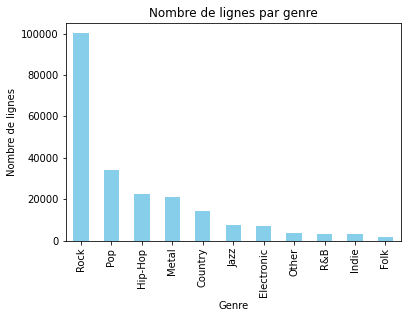

In [7]:


# Utiliser value_counts() pour obtenir le nombre de lignes pour chaque valeur unique dans la colonne "genre"
nombre_lignes_par_genre = df['genre'].value_counts()

# Créer un diagramme à barres
nombre_lignes_par_genre.plot(kind='bar', color='skyblue')

# Ajouter des étiquettes
plt.title('Nombre de lignes par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de lignes')

# Afficher le diagramme
plt.show()


# Nettoyage des données

In [8]:
# Supprimer les colonnes "year" et "index"
#Index(['Unnamed: 0', 'index', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')
df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

# Supprimez les lignes en double basées sur le titre et l'artiste
df = df.drop_duplicates(subset=['artist', 'song'])

df.drop_duplicates(subset="song", inplace=True)
print(df.shape)

# Afficher le DataFrame après suppression des colonnes
print(df.head)

(151690, 5)
<bound method NDFrame.head of                                song  year           artist    genre  \
0                         ego-remix  2009  beyonce-knowles      Pop   
1                      then-tell-me  2009  beyonce-knowles      Pop   
2                           honesty  2009  beyonce-knowles      Pop   
3                   you-are-my-rock  2009  beyonce-knowles      Pop   
4                     black-culture  2009  beyonce-knowles      Pop   
...                             ...   ...              ...      ...   
218202                   cherry-pie  2012       edens-edge  Country   
218203                feels-so-real  2012       edens-edge  Country   
218204                 swingin-door  2012       edens-edge  Country   
218205    who-am-i-drinking-tonight  2012       edens-edge  Country   
218208  christ-alone-live-in-studio  2012       edens-edge  Country   

                                                   lyrics  
0       Oh baby how you doing You know I'm go

In [9]:
# Vérifier le nombre de valeurs nulles dans chaque colonne
nombre_valeurs_nulles_par_colonne = df.isnull().sum()
# Afficher le résultat
print(nombre_valeurs_nulles_par_colonne)

# Supprimer les lignes contenant des valeurs nulles
df_sans_nulles = df.dropna()

# Afficher le DataFrame après suppression des lignes avec des valeurs nulles
print(df_sans_nulles)

song      1
year      0
artist    0
genre     0
lyrics    0
dtype: int64
                               song  year           artist    genre  \
0                         ego-remix  2009  beyonce-knowles      Pop   
1                      then-tell-me  2009  beyonce-knowles      Pop   
2                           honesty  2009  beyonce-knowles      Pop   
3                   you-are-my-rock  2009  beyonce-knowles      Pop   
4                     black-culture  2009  beyonce-knowles      Pop   
...                             ...   ...              ...      ...   
218202                   cherry-pie  2012       edens-edge  Country   
218203                feels-so-real  2012       edens-edge  Country   
218204                 swingin-door  2012       edens-edge  Country   
218205    who-am-i-drinking-tonight  2012       edens-edge  Country   
218208  christ-alone-live-in-studio  2012       edens-edge  Country   

                                                   lyrics  
0       Oh bab

In [10]:
# Supprimer les lignes avec le genre 'Other'
df = df.loc[df['genre'] != 'Other']

# Afficher le DataFrame après suppression des lignes avec le genre 'Other'
print(df)

                               song  year           artist    genre  \
0                         ego-remix  2009  beyonce-knowles      Pop   
1                      then-tell-me  2009  beyonce-knowles      Pop   
2                           honesty  2009  beyonce-knowles      Pop   
3                   you-are-my-rock  2009  beyonce-knowles      Pop   
4                     black-culture  2009  beyonce-knowles      Pop   
...                             ...   ...              ...      ...   
218202                   cherry-pie  2012       edens-edge  Country   
218203                feels-so-real  2012       edens-edge  Country   
218204                 swingin-door  2012       edens-edge  Country   
218205    who-am-i-drinking-tonight  2012       edens-edge  Country   
218208  christ-alone-live-in-studio  2012       edens-edge  Country   

                                                   lyrics  
0       Oh baby how you doing You know I'm gonna cut r...  
1       playin everything s

In [11]:
# Garder les lignes avec une année supérieure à 2000
#df = df[df['year'] > 2000]

# Afficher le DataFrame après le filtrage
#print(df)

In [12]:
print("Nombre de genre de musique : ", df['genre'].nunique())
print("Nombre d artiste : ", df['artist'].nunique())

Nombre de genre de musique :  10
Nombre d artiste :  8207


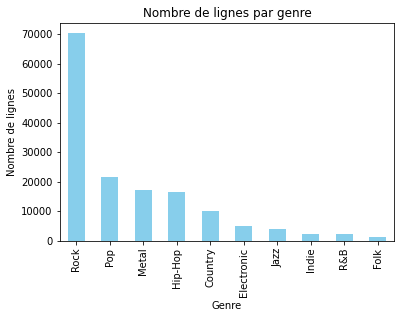

In [13]:


# Utiliser value_counts() pour obtenir le nombre de lignes pour chaque valeur unique dans la colonne "genre"
nombre_lignes_par_genre = df['genre'].value_counts()

# Créer un diagramme à barres
nombre_lignes_par_genre.plot(kind='bar', color='skyblue')

# Ajouter des étiquettes
plt.title('Nombre de lignes par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de lignes')

# Afficher le diagramme
plt.show()


In [14]:
import re

# Assurez-vous d'avoir téléchargé les données nécessaires en exécutant
nltk.download('punkt')
nltk.download('stopwords')


def clean_text(text):
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Mettre en minuscules
    text = text.lower()

    # Supprimer les caractères numériques
    text = re.sub(r'\d+', '', text)

    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)

    # Supprimer les balises HTML (si applicable)
    text = re.sub(r'<.*?>', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Supprimer les mots très courts (par exemple, moins de 3 caractères)
    words = [word for word in words if len(word) > 2]

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Supprimer les mots vides (pour l'anglais dans cet exemple)
    stop_words = set(stopwords.words('english'))

    #custom_stop_words = ['got', 'know', 'yeah', 'one', 'get', 'dont', 'come', 'aint', 'day', 'life','night', 'away', 'like', 'time', 'wa', 'say', 'need', 'love', 'youre', 'make','baby', 'want', 'little', 'let', 'cause', 'thats', 'long', 'eye', 'right','shes', 'way', 'world','tell', 'look', 'gon', 'hey', 'tell', 'thing', 'think']
    # Ajouter des mots personnalisés à la liste des mots vides
    #stop_words.update(custom_stop_words)

    words = [word for word in words if word.lower() not in stop_words]

    # Rejoindre les mots en une chaîne de texte
    cleaned_text = ' '.join(words)

    return cleaned_text

df['text_clean'] = df['lyrics'].apply(clean_text)
print(df['text_clean'])


[nltk_data] Downloading package punkt to /home/faycal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/faycal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0         baby know gon cut right chase woman made like ...
1         playin everything easy like seem sure still wa...
2         search tenderness isnt hard find love need liv...
3         wrote book stand title book would life superma...
4         party people people party popping sitting arou...
                                ...                        
218202    first pony cherry pie little girl taught fly s...
218203    wa two year ago wa yesterday might make sense ...
218204    youve got texas way walking youve got sexy way...
218205    got say boy couple date youre hand outright bl...
218208    fly mortal earth measured depth girth father s...
Name: text_clean, Length: 149529, dtype: object


# Vectorisation

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [16]:

# Vectorisation des paroles
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text_clean'])

In [17]:

optimal_k = 7  # Choisissez le k à l'endroit du coude dans le graphique

# Clustering avec k-means en utilisant le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


/home/faycal/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f46aa01eaf0>
Traceback (most recent call last):
  File "/home/faycal/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/faycal/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/faycal/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/faycal/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_

In [18]:
# Affichage des résultats
for cluster_id in range(df['cluster'].nunique()):
    print(f"Cluster {cluster_id}:")

    # Afficher les 5 premières chansons du cluster avec les informations sur l'artiste et la chanson
    print(df[df['cluster'] == cluster_id][['text_clean', 'song', 'artist']].head(5))

    print("\n")

Cluster 0:
                                           text_clean  \
10  lay alone awake night sorrow fill eye strong e...   
19  nobody like played beyonc beyonc bisasha bisas...   
20  nobody like played beyonce beyonce sasha sasha...   
21  nobody like played beyonc beyonc bisasha bisas...   
37  remember used take bike ride every day bayou r...   

                                song           artist  
10                     save-the-hero  beyonce-knowles  
19            beautiful-liar-spanish  beyonce-knowles  
20  beautiful-liar-spanglish-version  beyonce-knowles  
21               beutiful-liar-remix  beyonce-knowles  
37                daddy-hidden-track  beyonce-knowles  


Cluster 1:
                                           text_clean                    song  \
1   playin everything easy like seem sure still wa...            then-tell-me   
2   search tenderness isnt hard find love need liv...                 honesty   
9   honey better sit look around cause mustve bump... 

In [19]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.cluster import KMeans
import string

# Pour chaque cluster, obtenir les 10 mots les plus fréquents
for cluster_id in range(df['cluster'].nunique()):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_text = ' '.join(cluster_data['text_clean'])

    # Utiliser CountVectorizer pour compter la fréquence des mots
    cluster_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    cluster_X = cluster_vectorizer.fit_transform([cluster_text])
    
    # Obtenir les mots les plus fréquents
    feature_names = cluster_vectorizer.get_feature_names_out()
    word_frequencies = cluster_X.toarray().flatten()
    top_words_indices = word_frequencies.argsort()[::-1][:10]
    top_words = [feature_names[i] for i in top_words_indices]
    
    # Afficher les résultats pour chaque cluster
    print(f"Cluster {cluster_id} - Top 10 mots fréquents: {', '.join(top_words)}")

Cluster 0 - Top 10 mots fréquents: like, come, life, time, know, let, world, dont, love, night
Cluster 1 - Top 10 mots fréquents: dont, know, want, like, let, love, say, youre, got, need
Cluster 2 - Top 10 mots fréquents: wa, like, said, know, time, love, got, day, dont, man
Cluster 3 - Top 10 mots fréquents: got, like, know, baby, yeah, dont, gon, girl, aint, let
Cluster 4 - Top 10 mots fréquents: nigga, like, got, shit, bitch, dont, aint, know, fuck, cause
Cluster 5 - Top 10 mots fréquents: love, know, dont, like, baby, heart, got, youre, let, time
Cluster 6 - Top 10 mots fréquents: know, time, youre, like, ill, way, dont, say, ive, away


In [20]:
import nltk
from pywsd.lesk import simple_lesk
import numpy as np
from nltk.corpus import wordnet as wn

class SentenceSimilarity:

    def __init__(self, mesure):
        self.word_order = False
        self.mesure = mesure


    def identifyWordsForComparison(self, sentence):
        #Taking out Noun and Verb for comparison word based
        tokens = nltk.word_tokenize(sentence)
        pos = nltk.pos_tag(tokens)
        pos = [p for p in pos if p[1].startswith('N') or p[1].startswith('V')]
        return pos

    def wordSenseDisambiguation(self, sentence):
        # removing the disambiguity by getting the context

        pos = self.identifyWordsForComparison(sentence)
        sense = []
        for p in pos:
            sense.append(simple_lesk(sentence, p[0], pos=p[1][0].lower()))
        return set(sense)

    def getSimilarity(self, arr1, arr2, vector_len):
        #cross multilping all domains
        vector = [0.0] * vector_len
        count = 0
        for i,a1 in enumerate(arr1):
            all_similarityIndex=[]
            for a2 in arr2:
                if a1 and a1.name() and a2 and a2.name():
                    #similarity = wn.synset(a1.name()).wup_similarity(wn.synset(a2.name()))
                    similarity = self.mesure(wn.synset(a1.name()), wn.synset(a2.name()))
                else:
                    similarity = None

                if similarity != None:
                    all_similarityIndex.append(similarity)
                else:
                    all_similarityIndex.append(0.0)


            if not all_similarityIndex:
                #return [0.0] * vector_len, count
                vector[i]= 0.0 #all_similarityIndex[0]
                #count +=1
                continue
            all_similarityIndex = sorted(all_similarityIndex, reverse = True)
            vector[i]=all_similarityIndex[0]
            if vector[i] >= 0.804:
                count +=1
        return vector, count

    def shortestPathDistance(self, sense1, sense2):
        #getting the shortest path to get the similarity
        if len(sense1) >= len(sense2):
            grt_Sense = len(sense1)
            v1, c1 = self.getSimilarity(sense1, sense2, grt_Sense)
            v2, c2 = self.getSimilarity(sense2, sense1, grt_Sense)
        if len(sense2) > len(sense1):
            grt_Sense = len(sense2)
            v1, c1 = self.getSimilarity(sense2, sense1, grt_Sense)
            v2, c2 = self.getSimilarity(sense1, sense2, grt_Sense)
        return np.array(v1),np.array(v2),c1,c2

    def main(self, sentence1, sentence2):
        sense1 = self.wordSenseDisambiguation(sentence1)
        sense2 = self.wordSenseDisambiguation(sentence2)
        v1,v2,c1,c2 = self.shortestPathDistance(sense1,sense2)
        dot = np.dot(v1,v2)
        tow = (c1+c2)
        if tow == 0:
            tow = len(sense1) / 2
        if tow != 0:
            final_similarity = (dot/tow)
            return final_similarity
        else:
            return 0

Warming up PyWSD (takes ~10 secs)... took 4.440288543701172 secs.


In [21]:
# boucle sur tout une list de différent texte (devrai etre les éléments de chaque cluster)
def calculate_cluster_similarity(sentences, mesure="wup"):
    n = len(sentences)
    total_similarity = 0
    pair_count = 0
    fmesure = None
    if mesure == "wup":
        fmesure = wn.wup_similarity
    elif mesure == "path":
        fmesure = wn.path_similarity
    else:
        fmesure = wn.wup_similarity

    obj = SentenceSimilarity(fmesure)
    for i in range(0, n, 2):
        j = i-1
        if i+1 == n:
            j = 0
        similarity = obj.main(sentences[i], sentences[j])
        total_similarity += similarity
        pair_count += 1
        if pair_count % 20 == 0:
            print(total_similarity)


    if pair_count == 0:
        return 0

    overall_similarity = total_similarity / pair_count
    return overall_similarity

In [22]:
def delete_dupli_word(sentence):
    words = sentence.split()
    unique_words = []

    for word in words:
        if word not in unique_words:
            unique_words.append(word)

    new_sentence = ' '.join(unique_words)
    return new_sentence

In [23]:
def importantwordss(sentence, n):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)

    filtered_words = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('V')]

    filtered_sentence = " ".join(filtered_words)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([filtered_sentence])

    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    word_tfidf_dict = dict(zip(feature_names, tfidf_scores))

    sorted_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

    top_words = [word for word, score in sorted_words[:n]]

    return " ".join(top_words)

In [24]:
used_metric = "wup"
allval = []
n = 1000
for cluster_id in range(df['cluster'].nunique()):
    print(f"Cluster {cluster_id}:")
    cluster_elements = df[df['cluster'] == cluster_id]['text_clean'][:n].tolist()
    cluster_elements = [importantwordss(sentence, 20) for sentence in cluster_elements]

    overall_similarity = calculate_cluster_similarity(cluster_elements, used_metric)
    allval.append(overall_similarity)
    print(f"Overall {used_metric} Similarity: {overall_similarity}")


Cluster 0:
9.314348684653245
16.541032604532212
25.513424617205757
36.42148606011313
49.22677207703177
61.44984899447362
74.3168608565511
83.4231578095534
96.61927916613293
108.43166102667304
127.32137439459841
137.9577257869673
149.6963043058044
159.64044480528017
179.34949342451506
193.34543238866604
205.87025760332784
218.63281885870197
232.72378482113774
243.210037459145
260.57856606117724
277.9513110967216
295.78748552862356
312.2192413915584
323.97828418527155
Overall wup Similarity: 0.647956568370543
Cluster 1:
17.96459292138904
29.724689627324587
41.121327391883504
56.87918866170572
70.39689272191566
82.5073312041321
95.2419852930853
107.38548832918019
127.7328654496451
141.6862534589522
153.8911372160629
164.69661665477105
179.03122865835678
192.35535634907774
205.60357761998088
222.85150052470078
239.61993317552717
254.45289260167422
268.35602722852724
283.0639865197579
296.8817378567575
307.2744523662619
320.5421453635135
343.2815543816469
353.0786824637905
Overall wup Simil

In [27]:
print(f"table of scores for {used_metric} :")

for i in range(len(allval)):
    print(f"cluster {i + 1} = {allval[i]}")

table of scores for wup :
cluster 1 = 0.647956568370543
cluster 2 = 0.7061573649275811
cluster 3 = 0.8186315913834586
cluster 4 = 0.6839575896905451
cluster 5 = 0.7978581033239931
cluster 6 = 0.8575122842918277
cluster 7 = 0.740355982808812
